In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data = pd.read_csv('startUp(1).csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dx = data.copy()

In [6]:
dx.isnull().sum()

Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
# SCALING THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in dx.columns:
  if dx[i].dtypes != 'O':
    dx[[i]] = scaler.fit_transform(dx[[i]])

dx.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,-1.697749,2.016411,0.560753,2.153943,New York,2.011203
1,-1.628453,1.955860,1.082807,1.923600,California,1.999430
2,-1.559158,1.754364,-0.728257,1.626528,Florida,1.980842
3,-1.489862,1.554784,-0.096365,1.422210,New York,1.776627
4,-1.420566,1.504937,-1.079919,1.281528,Florida,1.357740


In [9]:
# ENCODING THE DATA
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in dx.columns:
  if dx[i].dtypes == 'O':
    dx[i] = encoder.fit_transform(dx[i])

dx.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,-1.697749,2.016411,0.560753,2.153943,2,2.011203
1,-1.628453,1.955860,1.082807,1.923600,0,1.999430
2,-1.559158,1.754364,-0.728257,1.626528,1,1.980842
3,-1.489862,1.554784,-0.096365,1.422210,2,1.776627
4,-1.420566,1.504937,-1.079919,1.281528,1,1.357740


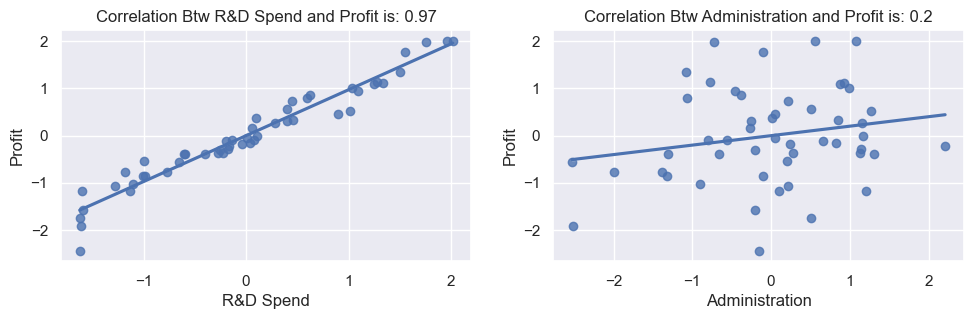

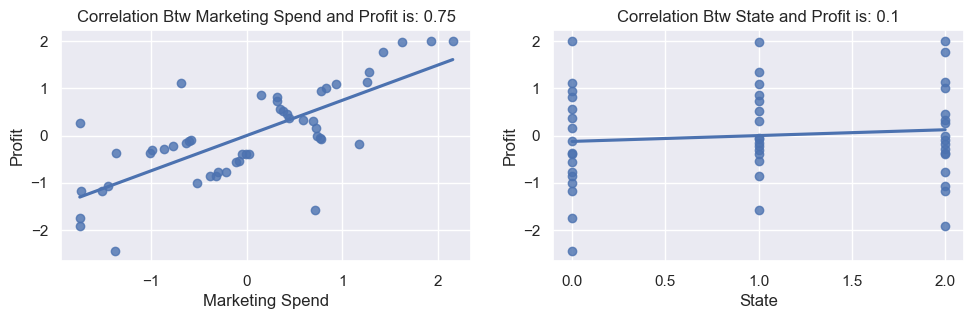

In [10]:
def plotter(dataframe,a,b, dependent):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 3))

    plt.subplot(1, 3, 1)
    sns.regplot(x = dataframe[a], y = dataframe[dependent], ci = 0)
    plt.title(f"Correlation Btw {a} and {dependent} is: {dataframe[dependent].corr(dataframe[a]).round(2)}")

    plt.subplot(1, 3, 2)
    sns.regplot(x = dataframe[b], y = dataframe[dependent], ci = 0)
    plt.title(f"Correlation Btw {b} and {dependent} is: {dataframe[dependent].corr(dataframe[b]).round(2)}")

    plt.show()

plotter(dx, 'R&D Spend', 'Administration', 'Profit')
plotter(dx,  'Marketing Spend', 'State', 'Profit')

In [11]:
# drop State since it doesn't satisfy the assumption of Linearity
dx.drop('State', axis = 1, inplace = True)
dx.columns

Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend',
       'Profit'],
      dtype='object')

<AxesSubplot:>

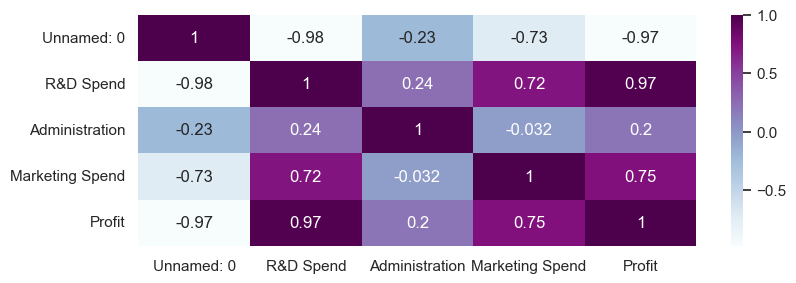

In [12]:
# Assumption of Multicolinearity
plt.figure(figsize = (9, 3))
sns.heatmap(dx.corr(), annot = True, cmap = 'BuPu')

In [13]:
# Train And Test Split
x = dx.drop('Profit', axis = 1)
y = dx.Profit

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 45)
print(f'xtrain: {xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')

xtrain: (40, 4)
ytrain: (40,)
xtest: (10, 4)
ytest: (10,)


In [14]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print(f'\t\tTrain DataSet')
display(train_set.head())
print(f'\n\t\tTest DataSet')
display(test_set.head())

		Train DataSet


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
20,-0.311832,0.055726,-0.269588,0.723926,0.161935
18,-0.450423,0.396725,-0.258465,0.692992,0.307116
16,-0.589015,0.094441,0.009118,0.440446,0.375436
40,1.074086,-0.989577,-0.100900,-0.315786,-0.846411
44,1.351270,-1.134305,1.206419,-1.509074,-1.173209



		Test DataSet


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
47,1.559158,-1.622362,0.507722,-1.743127,-1.740627
7,-1.212678,1.245057,0.871980,0.932186,1.096210
2,-1.559158,1.754364,-0.728257,1.626528,1.980842
9,-1.074086,1.091819,-0.456640,0.776107,0.946022
5,-1.351270,1.279800,-0.776239,1.254210,1.127250


In [15]:
# --------- Modelling ----------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(xtrain, ytrain) # --------------------------Create a linear regression model

# -------------- cross validation -------------
cross_validate = lin_reg.predict(xtrain)
score = r2_score(cross_validate, ytrain)
print(f'The Cross Validation Score is: {score.round(2)}')


The Cross Validation Score is: 0.95


In [16]:
# Model Metrics and Testing
test_prediction = lin_reg.predict(xtest)
score = r2_score(test_prediction, ytest)
print(f'The Cross Validation Score is: {score.round(2)}')


The Cross Validation Score is: 0.97


In [ ]:
import pickle

# save model
pickle.dump(lin_reg, open('StartUp_Model.pkl', "wb"))